In [2]:
import streamlit as st
import numpy as np
from datetime import datetime, timedelta

In [3]:
def binomial_option_pricing(S, K, T, r, sigma, N, option_type="call"):

    '''
    S: current stock price
    K: strike price of option
    T: time to maturity in years
    r: risk-free rate
    sigma: volatility of underlying asset
    N: number of time steps
    delta_t: time interval per step
    u: up factor of stock price (in %)
    d: down factor of stock price (in %)
    p: risk neutral probability of up move
    ST: matrix of stock prices at each node
    option_values: array of option values at each node
    '''
    
    # Calculate the necessary parameters
    delta_t = T / N
    u = np.exp(sigma * np.sqrt(delta_t)) #
    d = 1 / u
    p = (np.exp(r * delta_t) - d) / (u - d)
    
    # create a (N+1) x (N+1) matrix to store price at each node
    ST = np.zeros((N + 1, N + 1)) 
    for i in range(N + 1):
        for j in range(i + 1):
            ST[j, i] = S * (u ** (i - j)) * (d ** j)
    
    # Initialize option values at each node as a (N+1) x (N+1) matrix
    option_values = np.zeros((N + 1, N + 1))
    #calculate option price at the end
    if option_type == "call":
        option_values[:, N] = np.maximum(ST[:, N] - K, 0)
    elif option_type == "put":
        option_values[:, N] = np.maximum(K - ST[:, N], 0)
    
    # Backward induction to get the option value at each node
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option_values[j, i] = np.exp(-r * delta_t) * (p * option_values[j, i+1] + (1-p) * option_values[j+1, i+1])
            if option_type == "call":
                option_values[j, i] = np.maximum(option_values[j, i], ST[j, i] - K)
            elif option_type == "put":
                option_values[j, i] = np.maximum(option_values[j, i], K - ST[j, i])
    
    return ST, option_values

In [4]:
# Example usage
S = 100  # Current stock price
K = 105  # Strike price
T = 1    # Time to maturity (in years)
r = 0.05 # Risk-free interest rate
sigma = 0.2  # Volatility
N = 10    # Number of time steps (to generate 4x4 matrices, N should be 3)

stock_matrix, option_matrix = binomial_option_pricing(S, K, T, r, sigma, N, "call")


In [5]:
#option price at initial state (current time)
option_matrix[0, 0]

8.176296974444437

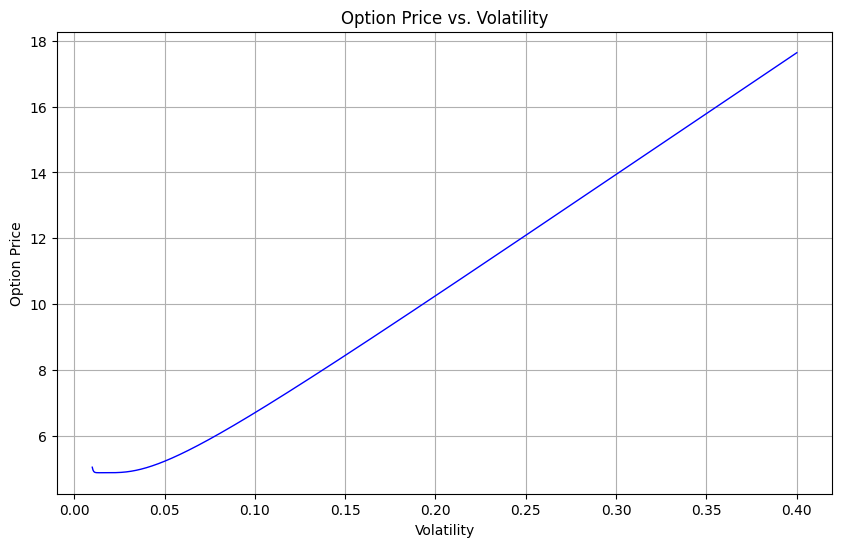

In [16]:
#calculate a draw relationship between volatility and option rices
import numpy as np
import matplotlib.pyplot as plt

#create 1000 evenly spaced values between 0.1 and 0.5
volatilities = np.linspace(0.01, 0.4, 1000)
option_prices = []

# Calculate option prices for different volatilities
for v in volatilities:
    _, option_matrix = binomial_option_pricing(S, K, T, r, v, N, "call")
    option_prices.append(option_matrix[0, 0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(volatilities, option_prices, linestyle='-', color='b', linewidth=1)
plt.xlabel('Volatility')
plt.ylabel('Option Price')
plt.title('Option Price vs. Volatility')
plt.grid(True)
plt.show()

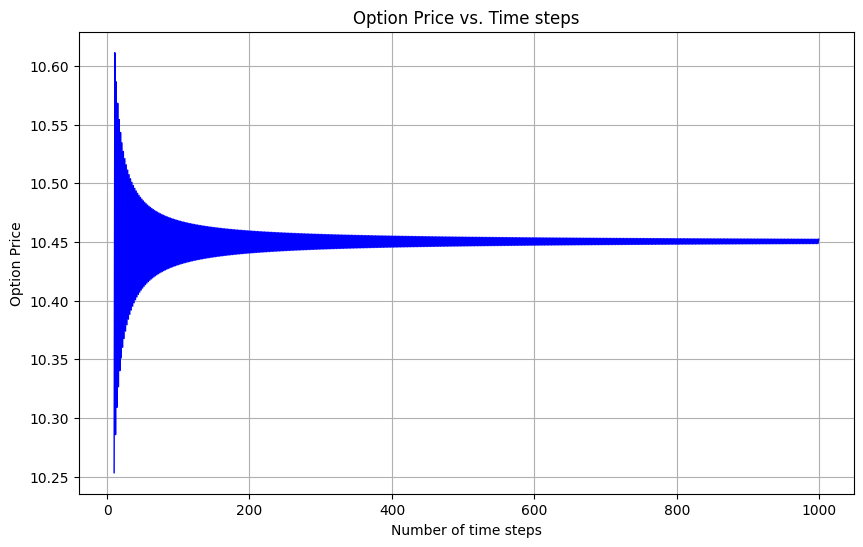

In [18]:
#calculate the price with respect to number of time points
import numpy as np
import matplotlib.pyplot as plt

option_prices = []
#from 10 to 1000 with a step of 1
times_steps = np.arange(10, 1000, 1) #takes 5 minutes to run if (10, 1000, 1)
for n in times_steps:
    _, option_matrix = binomial_option_pricing(S, K, T, r, sigma, n, "call")
    option_prices.append(option_matrix[0, 0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(times_steps, option_prices, linestyle='-', color='b', linewidth=1)
plt.xlabel('Number of time steps')
plt.ylabel('Option Price')
plt.title('Option Price vs. Time steps')
plt.grid(True)
plt.show()

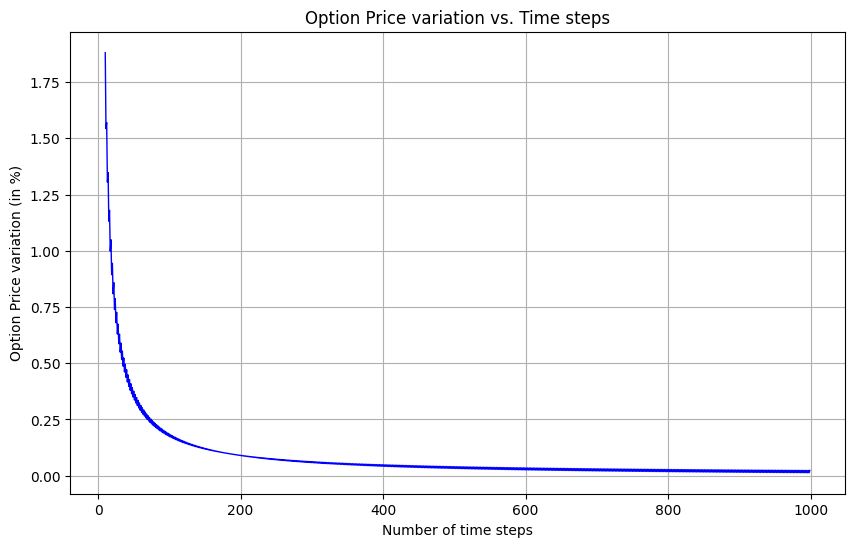

In [22]:
#calculate % deviation
mean_price = sum(option_prices) / len(option_prices)
options_prices_deviation = [(abs(price-mean_price)/mean_price)*100 for price in option_prices]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(times_steps, options_prices_deviation, linestyle='-', color='b', linewidth=1)
plt.xlabel('Number of time steps')
plt.ylabel('Option Price variation (in %)')
plt.title('Option Price variation vs. Time steps')
plt.grid(True)
plt.show()
